<a href="https://colab.research.google.com/github/dustin-kang/Proj4_LyricsGenerator/blob/main/Note/%5BP402%5DWordClouds_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 데이터 전처리 후 시각화


## 한글 깨짐 방지

```python
# STEP 1 : 나눔폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# STEP 2 : 코랩(Colab)의 런타임을 재시작 합니다.
런타임 재시작

# STEP 3 : 나눔 폰트 지정
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
```

```python
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import matplotlib as mpl

# 첫번째 방법
%config InlineBackend.figure_format='retina'

# 두번째 방법
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# 둘 중 편한걸로 사용
```


In [3]:
%config InlineBackend.figure_format='retina'

## 모듈 임포트

In [34]:
from wordcloud import WordCloud
import numpy as np
import time
import warnings
import matplotlib.pyplot as plt
import matplotlib as mpl

# 전처리 모듈
from collections import Counter
import pandas as pd



In [5]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df = pd.read_csv('/content/drive/MyDrive/AI07/hiphop100_vibe.csv')

In [7]:
df.head()

,lyrics,singer,song
0,내가 슬플 때마다\n이 노래가 찾아와\n세상이 둥근 것처럼 우린 동글동글\n\n인생...,sokodomo,"회전목마 (Feat. Zion.T, 원슈타인) (Prod. Slom)"
1,까만 리무진 보며\n꿈을 키웠지\n언젠가는 나도 저걸 갖게 될 거야\n커다란 리무진...,BE'O(비오),리무진 (Feat. MINO) (Prod. GRAY)
2,Counting stars\n밤하늘에 펄\nBetter than your LV\nY...,BE'O(비오),Counting Stars (Feat. Beenzino)
3,만남은 쉽고 이별은 어려워\n눈빛에 베일 듯 우린 날카로워\n마침표를 찍고 난 조금...,베이식(Basick),만남은 쉽고 이별은 어려워 (Feat. Leellamarz) (Prod. TOIL)
4,불 협 화 음\n불 협 화 음\n불 협 화 음\n불 협 화 음\n\n학교 친구들은 ...,Mudd the student,불협화음 (Feat. AKMU) (Prod. GRAY)


## 시각화를 위한 텍스트 전처리

### 단어 카운트 함수 정의

In [40]:
def word_count(docs):
  """
  # 단어 카운트 함수

  - `word_counts` : 전체 코퍼스에서 단어 빈도를 카운트 합니다.
  - `word_in_docs` : 단어가 존재하는 문서의 빈도를 카운트 합니다.  만약에 단어가 한번 이상 존재하면 +1 합니다.
  - `total_docs` : 전체 문서의 갯수를  계산합니다.

  ## wc 데이터 프레임
  - `word` : 단어
  - `word_in_docs` : 문서의 빈도
  - `count` : 총 단어 갯수 
  - `rank` : 단어의 순위
  - `percent` : 코퍼스 내 단어의 비율
  - `cul_percent` : 누적 비율
  - `word_in_docs_percent` : 전체 문서 중에 존재하는 비율
  """

  word_counts = Counter()
  word_in_docs = Counter()
  total_docs = len(docs)

  for doc in docs : 
    word_counts.update(doc)
    word_in_docs.update(set(doc))

  temp = zip(word_counts.keys(), word_counts.values())

  # --------------------------------------------------

  wc = pd.DataFrame(temp, columns = ['word', 'count'])

  wc['rank'] = wc['count'].rank(method='first', ascending=False)
  total = wc['count'].sum()

  wc['percent'] = wc['count'].apply(lambda x: x / total)
  wc = wc.sort_values(by='rank')

  wc['cul_percent'] = wc['percent'].cumsum()

  temp2 = zip(word_in_docs.keys(), word_in_docs.values())
  ac = pd.DataFrame(temp2, columns=['word', 'word_in_docs'])
  wc = ac.merge(wc, on='word')
  
  wc['word_in_docs_percent'] = wc['word_in_docs'].apply(lambda x: x / total_docs)

  return wc.sort_values(by='rank')


### 파이썬 내장함수와 정규표현식 사용

In [13]:
def tokenize(text):
    regex = r"[^a-zA-Z0-9]"
    tokens = re.sub(regex, "", text)
    tokens = text.lower().replace('\n', ' ').split(' ')
    return tokens

In [14]:
df['tokens'] = df['lyrics'].apply(tokenize)

In [15]:
df['tokens']

0     [내가, 슬플, 때마다, 이, 노래가, 찾아와, 세상이, 둥근, 것처럼, 우린, 동...
1     [까만, 리무진, 보며, 꿈을, 키웠지, 언젠가는, 나도, 저걸, 갖게, 될, 거야...
2     [counting, stars, 밤하늘에, 펄, better, than, your,...
3     [만남은, 쉽고, 이별은, 어려워, 눈빛에, 베일, 듯, 우린, 날카로워, 마침표를...
4     [불, 협, 화, 음, 불, 협, 화, 음, 불, 협, 화, 음, 불, 협, 화, ...
                            ...                        
92    [we, from, gutta, 겁나, 벌어, 그녀처럼, 사랑스러워, 다섯, 살, ...
93    [let, me, introduce, you, to, some, new, thang...
94    [im, livin', in, a, fuckin, paranoid, 밤, 새, 나를...
95    [my, life, it’s, like, a, song, 너에게, 쓰는, 편지, 잘...
96    [왜, 떠, 떨었어?, 왜, 망설였어?, 남들의, 말, 땜에, 왜, 또, 얼었어?,...
Name: tokens, Length: 97, dtype: object

### 불용어 사전 사용

- 영어 불용어 제거하기
- **NLTK** 를 통해 불용어를 제거할 수 있습니다.



In [78]:
import nltk
nltk.download('stopwords') # 불용어 데이터를 설치합니다.
nltk.download('punkt')

from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [108]:
kr_list = "아 휴 아이구 아이쿠 아이고 어 나 우리 저희 따라 의해 을 를 에 의 가 으로 로 에게 뿐이다 의거하여 근거하여 입각하여 기준으로 예하면 예를 들면 예를 들자면 저 소인 소생 저희 지말고 하지마 하지마라 다른 물론 또한 그리고 비길수 없다 해서는 안된다 뿐만 아니라 만이 아니다 만은 아니다 막론하고 관계없이 그치지 않다 그러나 그런데 하지만 든간에 논하지 않다 따지지 않다 설사 비록 더라도 아니면 만 못하다 하는 편이 낫다 불문하고 향하여 향해서 향하다 쪽으로 틈타 이용하여 타다 오르다 제외하고 이 외에 이 밖에 하여야 비로소 한다면 몰라도 외에도 이곳 여기 부터 기점으로 따라서 할 생각이다 하려고하다 이리하여 그리하여 그렇게 함으로써 하지만 일때 할때 앞에서 중에서 보는데서 으로써 로써 까지 해야한다 일것이다 반드시 할줄알다 할수있다 할수있어 임에 틀림없다 한다면 등 등등 제 겨우 단지 다만 할뿐 딩동 댕그 대해서 대하여 대하면 훨씬 얼마나 얼마만큼 얼마큼 남짓 여 얼마간 약간 다소 좀 조금 다수 몇 얼마 지만 하물며 또한 그러나 그렇지만 하지만 이외에도 대해 말하자면 뿐이다 다음에 반대로 반대로 말하자면 이와 반대로 바꾸어서 말하면 바꾸어서 한다면 만약 그렇지않으면 까악 툭 딱 삐걱거리다 보드득 비걱거리다 꽈당 응당 해야한다 에 가서 각 각각 여러분 각종 각자 제각기 하도록하다 와 과 그러므로 그래서 고로 한 까닭에 하기 때문에 거니와 이지만 대하여 관하여 관한 과연 실로 아니나다를가 생각한대로 진짜로 한적이있다 하곤하였다 하 하하 허허 아하 거바 와 오 왜 어째서 무엇때문에 어찌 하겠는가 무슨 어디 어느곳 더군다나 하물며 더욱이는 어느때 언제 야 이봐 어이 여보시오 흐흐 흥 휴 헉헉 헐떡헐떡 영차 여차 어기여차 끙끙 아야 앗 아야 콸콸 졸졸 좍좍 뚝뚝 주룩주룩 솨 우르르 그래도 또 그리고 바꾸어말하면 바꾸어말하자면 혹은 혹시 답다 및 그에 따르는 때가 되어 즉 지든지 설령 가령 하더라도 할지라도 일지라도 지든지 몇 거의 하마터면 인젠 이젠 된바에야 된이상 만큼 어찌됏든 그위에 게다가 점에서 보아 비추어 보아 고려하면 하게될것이다 일것이다 비교적 좀 보다더 비하면 시키다 하게하다 할만하다 의해서 연이서 이어서 잇따라 뒤따라 뒤이어 결국 의지하여 기대여 통하여 자마자 더욱더 불구하고 얼마든지 마음대로 주저하지 않고 곧 즉시 바로 당장 하자마자 밖에 안된다 하면된다 그래 그렇지 요컨대 다시 말하자면 바꿔 말하면 즉 구체적으로 말하자면 시작하여 시초에 이상 허 헉 허걱 바와같이 해도좋다 해도된다 게다가 더구나 하물며 와르르 팍 퍽 펄렁 동안 이래 하고있었다 이었다 에서 로부터 까지 예하면 했어요 해요 함께 같이 더불어 마저 마저도 양자 모두 습니다 가까스로 하려고하다 즈음하여 다른 다른 방면으로 해봐요 습니까 했어요 말할것도 없고 무릎쓰고 개의치않고 하는것만 못하다 하는것이 낫다 매 매번 들 모 어느것 어느 로써 갖고말하자면 어디 어느쪽 어느것 어느해 어느 년도 라 해도 언젠가 어떤것 어느것 저기 저쪽 저것 그때 그럼 그러면 요만한걸 그래 그때 저것만큼 그저 이르기까지 할 줄 안다 할 힘이 있다 너 너희 당신 어찌 설마 차라리 할지언정 할지라도 할망정 할지언정 구토하다 게우다 토하다 메쓰겁다 옆사람 퉤 쳇 의거하여 근거하여 의해 따라 힘입어 그 다음 버금 두번째로 기타 첫번째로 나머지는 그중에서 견지에서 형식으로 쓰여 입장에서 위해서 단지 의해되다 하도록시키다 뿐만아니라 반대로 전후 전자 앞의것 잠시 잠깐 하면서 그렇지만 다음에 그러한즉 그런즉 남들 아무거나 어찌하든지 같다 비슷하다 예컨대 이럴정도로 어떻게 만약 만일 위에서 서술한바와같이 인 듯하다 하지 않는다면 만약에 무엇 무슨 어느 어떤 아래윗 조차 한데 그럼에도 불구하고 여전히 심지어 까지도 조차도 하지 않도록 않기 위하여 때 시각 무렵 시간 동안 어때 어떠한 하여금 네 예 우선 누구 누가 알겠는가 아무도 줄은모른다 줄은 몰랏다 하는 김에 겸사겸사 하는바 그런 까닭에 한 이유는 그러니 그러니까 때문에 그 너희 그들 너희들 타인 것 것들 너 위하여 공동으로 동시에 하기 위하여 어찌하여 무엇때문에 붕붕 윙윙 나 우리 엉엉 휘익 윙윙 오호 아하 어쨋든 만 못하다 하기보다는 차라리 하는 편이 낫다 흐흐 놀라다 상대적으로 말하자면 마치 아니라면 쉿 그렇지 않으면 그렇지 않다면 안 그러면 아니었다면 하든지 아니면 이라면 좋아 알았어 하는것도 그만이다 어쩔수 없다 하나 일 일반적으로 일단 한켠으로는 오자마자 이렇게되면 이와같다면 전부 한마디 한항목 근거로 하기에 아울러 하지 않도록 않기 위해서 이르기까지 이 되다 로 인하여 까닭으로 이유만으로 이로 인하여 그래서 이 때문에 그러므로 그런 까닭에 알 수 있다 결론을 낼 수 있다 으로 인하여 있다 어떤것 관계가 있다 관련이 있다 연관되다 어떤것들 에 대해 이리하여 그리하여 여부 하기보다는 하느니 하면 할수록 운운 이러이러하다 하구나 하도다 다시말하면 다음으로 에 있다 에 달려 있다 우리 우리들 오히려 하기는한데 어떻게 어떻해 어찌됏어 어때 어째서 본대로 자 이 이쪽 여기 이것 이번 이렇게말하자면 이런 이러한 이와 같은 요만큼 요만한 것 얼마 안 되는 것 이만큼 이 정도의 이렇게 많은 것 이와 같다 이때 이렇구나 것과 같이 끼익 삐걱 따위 와 같은 사람들 부류의 사람들 왜냐하면 중의하나 오직 오로지 에 한하다 하기만 하면 도착하다 까지 미치다 도달하다 정도에 이르다 할 지경이다 결과에 이르다 관해서는 여러분 하고 있다 한 후 혼자 자기 자기집 자신 우에 종합한것과같이 총적으로 보면 총적으로 말하면 총적으로 대로 하다 으로서 참 그만이다 할 따름이다 쿵 탕탕 쾅쾅 둥둥 봐 봐라 아이야 아니 와아 응 아이 참나 년 월 일 령 영 일 이 삼 사 오 육 륙 칠 팔 구 이천육 이천칠 이천팔 이천구 하나 둘 셋 넷 다섯 여섯 일곱 여덟 아홉 령 영 이 있 하 것 들 그 되 수 이 보 않 없 나 사람 주 아니 등 같 우리 때 년 가 한 지 대하 오 말 일 그렇 위하 때문 그것 두 말하 알 그러나 받 못하 일 그런 또 문제 더 사회 많 그리고 좋 크 따르 중 나오 가지 씨 시키 만들 지금 생각하 그러 속 하나 집 살 모르 적 월 데 자신 안 어떤 내 내 경우 명 생각 시간 그녀 다시 이런 앞 보이 번 나 다른 어떻 여자 개 전 들 사실 이렇 점 싶 말 정도 좀 원 잘 통하 놓 난  ".split()

In [ ]:
stop_words = set(stopwords.words('english'))


result = []
result2 = []
for doc in df['tokens']:
  for w in doc:
    if w not in stop_words:
      if w not in kr_list:
         result.append(w)

print(result)

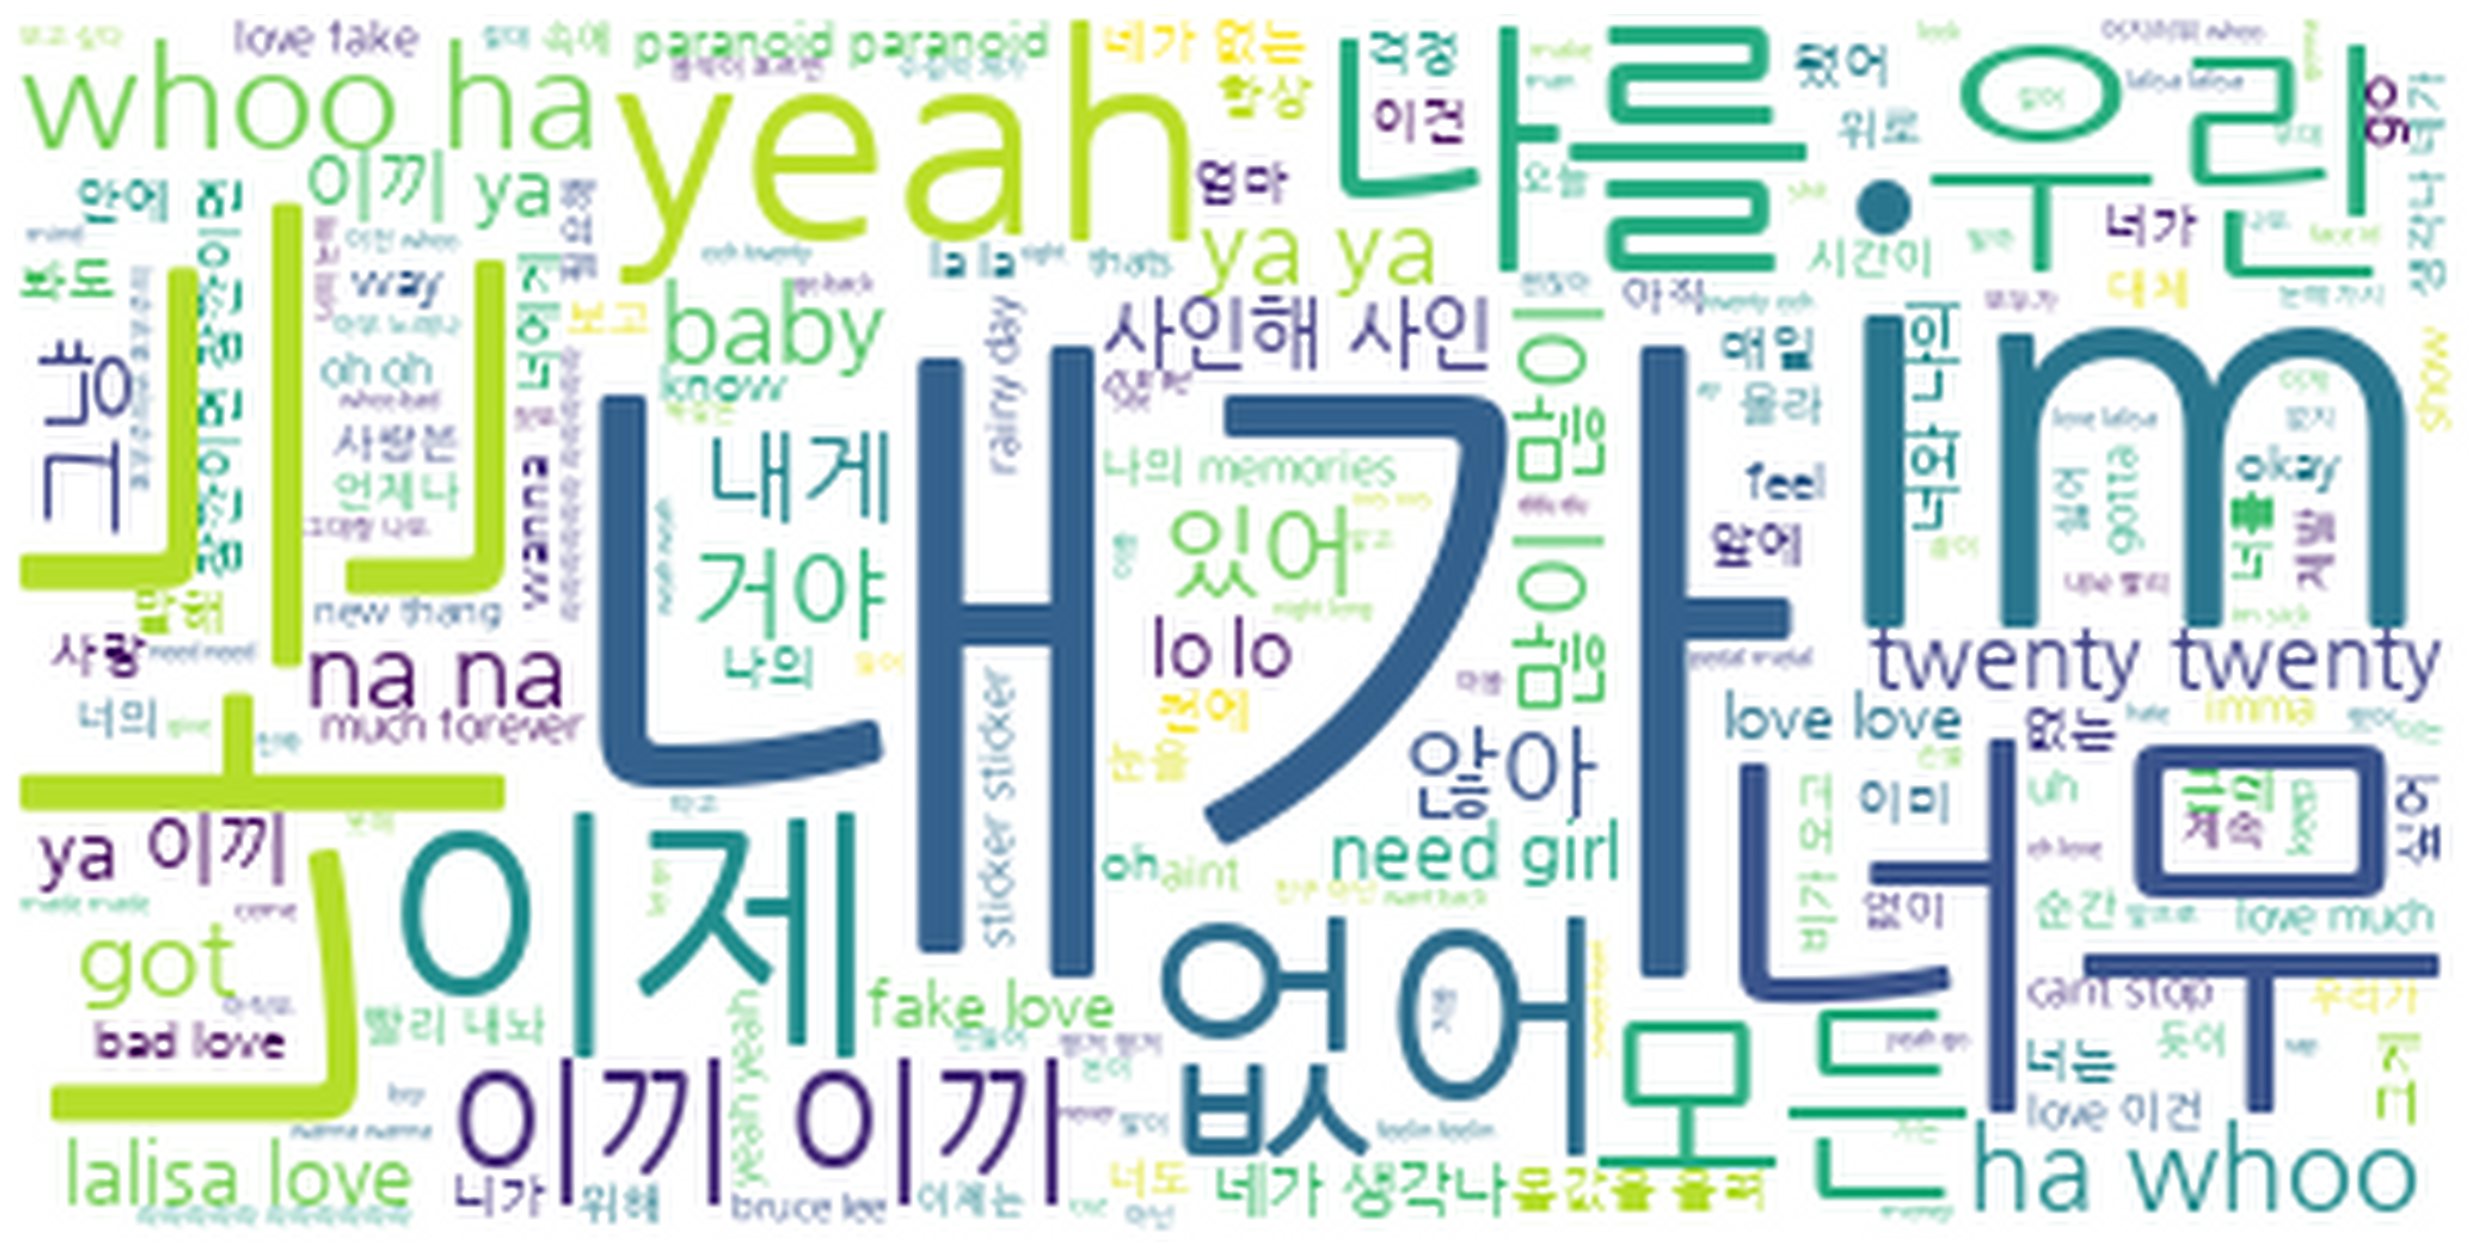

In [159]:
p1 = str(result).replace('[\'','').replace(',','').replace('\'','')


wordcloud = WordCloud(font_path='font/NanumGothic.ttf', background_color='white').generate(p1)

plt.figure(figsize=(22,22)) #이미지 사이즈 지정
plt.imshow(wordcloud, interpolation='lanczos') #이미지의 부드럽기 정도
plt.axis('off') #x y 축 숫자 제거
plt.show() 

## 모델링을 위한 텍스트 전처리

###  파이썬 내장 함수 와 정규 표현식
가사 생성을 위해 불용어 처리는 하지 않았습니다. 

In [136]:
def tokenize(text):
    regex = r"[^a-zA-Z0-9]"
    tokens = re.sub(regex, "", text)
    tokens = text.lower().replace('\n', ' ').replace(')', '').replace(',', '').split(' ')
    return tokens

In [137]:
df['tokens'] = df['lyrics'].apply(tokenize)
df['tokens']

p1 = str(result).replace('[\'','').replace(',','').replace('\'','')

0     [내가, 슬플, 때마다, 이, 노래가, 찾아와, 세상이, 둥근, 것처럼, 우린, 동...
1     [까만, 리무진, 보며, 꿈을, 키웠지, 언젠가는, 나도, 저걸, 갖게, 될, 거야...
2     [counting, stars, 밤하늘에, 펄, better, than, your,...
3     [만남은, 쉽고, 이별은, 어려워, 눈빛에, 베일, 듯, 우린, 날카로워, 마침표를...
4     [불, 협, 화, 음, 불, 협, 화, 음, 불, 협, 화, 음, 불, 협, 화, ...
                            ...                        
92    [we, from, gutta, 겁나, 벌어, 그녀처럼, 사랑스러워, 다섯, 살, ...
93    [let, me, introduce, you, to, some, new, thang...
94    [im, livin', in, a, fuckin, paranoid, 밤, 새, 나를...
95    [my, life, it’s, like, a, song, 너에게, 쓰는, 편지, 잘...
96    [왜, 떠, 떨었어?, 왜, 망설였어?, 남들의, 말, 땜에, 왜, 또, 얼었어?,...
Name: tokens, Length: 97, dtype: object

In [145]:
wc = word_count(df['tokens'])
wc

word_list = []
for i in wc.word[1:]:
  word_list.append(i)

## gensim을 활용한 Word2Vec

### biggram

In [168]:
import gensim
from gensim.models import Phrases
from gensim.models.word2vec import LineSentence
from gensim import corpora, models
from gensim.models import LdaMulticore
from gensim.models import Word2Vec
from gensim.corpora import Dictionary, MmCorpus


result = []
for doc in df['tokens']:
  for w in doc:
         result.append(w)
print(result)

p1 = str(result).replace('[\'','').replace(',','').replace('\'','')
f = open("lyrics_text.txt",'w')
f.write(f'{p1}')
f.close()

['내가', '슬플', '때마다', '이', '노래가', '찾아와', '세상이', '둥근', '것처럼', '우린', '동글동글', '', '인생은', '회전목마', '우린', '매일', '달려가', '언제쯤', '끝나', '난', '잘', '몰라', '', '어머', '벌써', '정신없이', '달려왔어', 'speed', 'up', '어제로', '돌아가는', '시곌', '보다가', '어려워', '어른이', '되어가는', '과정이', 'uh', 'huh', 'on', 'the', 'road', '24', '시간이', '아까워', 'uh', 'huh', 'big', 'noise', 'everything', 'brand', 'new', '어렸을', '때처럼', '바뀌지', '않는', '걸', '찾아', '나섰단', '말야', '왜냐면', '그때가', '더', '좋았어', '난', 'so', 'let', 'me', 'go', 'back', '타임머신', '타고', "i'll", 'go', 'back', '승호가', '좋았을', '때처럼만', '', '내가', '슬플', '때마다', '이', '노래가', '찾아와', '세상이', '둥근', '것처럼', '우리', '인생은', '회전목마', '우린', '매일', '달려가', '언제쯤', '끝나', '난', '잘', '몰라', '', '빙빙', '돌아가는', '회전목마처럼', '영원히', '계속될', '것처럼', '빙빙', '돌아올', '우리의', '시간처럼', '인생은', '회전목마', '', '어머', '벌써', '정신없이', '달려왔어', 'speed', 'up', '어제로', '돌아가는', '시곌', '보다가', '청춘까지', '뺏은', '현재', '', '탓할', '곳은', '어디', '없네', 'twenty', 'two', '세에게', '너무', '큰', '벽', '그게', '말로', '하고', '싶어도', '어려웠어', '가끔은', '어렸을', '때로', '돌아가', '불가능하단', '건', '나도', '잘',

In [169]:
USE_PREMADE_TEXT = False

text_filepath = './lyrics_text.txt'
if not USE_PREMADE_TEXT:
    with open(text_filepath, 'w', encoding='utf-8') as f:
        for lyrics in df.lyrics.values:
            if pd.isnull(lyrics): # null값 있다면 그 다음으로 넘어감
                continue
            f.write(lyrics + '\n')
else:
    assert path.exists(text_filepath)

In [171]:
USE_PREMADE_BIGRAM_MODEL = False

all_bigram_model_filepath = './bigram'
all_sentences_normalized_filepath = './lyrics_text.txt'

all_unigram_sentences = LineSentence(all_sentences_normalized_filepath)

if not USE_PREMADE_BIGRAM_MODEL:    
    
    all_bigram_model = Phrases(all_unigram_sentences) #phrase냐 아니냐를 판단해줌
    all_bigram_model.save(all_bigram_model_filepath)
    
else:
    all_bigram_model = Phrases.load(all_bigram_model_filepath)

In [174]:
USE_PREMADE_BIGRAM_SENTENCES = False

all_bigram_sentences_filepath = './wor2vec_sentense.txt'

if not USE_PREMADE_BIGRAM_SENTENCES:
    
    with open(all_bigram_sentences_filepath, 'w', encoding='utf-8') as f:
        for unigram_sentence in all_unigram_sentences:
            all_bigram_sentence = all_bigram_model[unigram_sentence]
            f.write(' '.join(all_bigram_sentence) + '\n')
else:
    assert path.exists(all_bigram_sentences_filepath)

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  start_token, in_between = word, []  # treat word as both end of a phrase AND beginning of another


### Wor2Vec 벡터화

In [176]:
USE_PREMADE_WORD2VEC = False

all2vec_filepath = './word2vec_model'

if not USE_PREMADE_WORD2VEC:
    
    lyrics_for_word2vec = LineSentence(all_bigram_sentences_filepath)

    all2vec = Word2Vec(lyrics_for_word2vec, size=100, window=5, min_count=1, sg=1)
    # sg=0 cbow 1=Skip-Gram Model
    # 100차원으로 가져옴 / 보통 20~100 정도
    # window = 5 앞 5개, 뒤 5개 단어를 보겠다는 뜻
    # window size 작을수록 문법적인 의미가 너무 중요해짐, 클수록 주제 지향적으로 문맥적인 정보를 많이 담게 됨    
    for _ in range(9):
        all2vec.train(lyrics_for_word2vec, total_examples=789847, epochs=1)
        # 9139곡 가사에 총 789847 문장이 있다는 것 명시
        
    all2vec.save(all2vec_filepath)
else:
    all2vec = Word2Vec.load(all2vec_filepath)
all2vec.init_sims()

In [178]:
all2vec_filepath = './word2vec_model'
all2vec = Word2Vec.load(all2vec_filepath)

In [179]:
all2vec.most_similar(positive=['사랑'], topn=5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('같아', 0.9974267482757568),
 ('되는', 0.9973121881484985),
 ('못된', 0.997198224067688),
 ('잘될', 0.9970356822013855),
 ('맘을', 0.9970162510871887)]

In [183]:
all2vec.most_similar(positive=['진심'], topn=5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('수압이', 0.9974945783615112),
 ('boring', 0.997469961643219),
 ('cake', 0.9974674582481384),
 ('봐야지', 0.9974581003189087),
 ('스물둘', 0.9972991943359375)]

### t-SNE

In [185]:
a = pd.DataFrame(all2vec.wv.index2word)
a.head()

len(a)

11294

In [186]:
# words = []
# for i in (range(11294)):
#     cnt = all2vec.wv.vocab[a[0][i]] # 횟수 카운트
#     if cnt.count > 100:
#         words.append(a[0][i]) # 횟수 100회 초과하는 단어만 리스트화
#     i += 1

In [202]:
words = []
for i in (range(11294)):
    cnt = all2vec.wv.vocab[a[0][i]] # 횟수 카운트
    words.append(a[0][i])
    i += 1

X = []
for i in words:
    X.append(all2vec.wv[i])

X2 = pd.DataFrame(X, index = words)
X2.head()

X2.shape

(11294, 100)

# 모델링

In [203]:
X2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
난,0.009614,0.016006,0.196802,0.126046,0.245305,-0.031693,0.259249,0.108078,-0.234226,0.034188,0.176529,-0.160776,0.162524,-0.262239,0.386628,0.315489,0.019167,-0.152314,0.428638,-0.019138,-0.301870,-0.345097,0.000276,-0.397332,0.020914,-0.119898,0.026192,-0.090335,-0.321436,0.068142,0.265518,-0.030926,-0.067444,-0.144809,0.493462,-0.273091,0.354552,-0.091385,-0.008243,-0.305009,...,0.095471,-0.338028,0.406626,-0.089953,-0.381553,-0.185522,-0.251618,-0.170457,-0.408082,-0.147931,-0.081525,-0.204535,-0.225191,-0.145058,0.248391,0.363555,-0.062026,-0.095900,0.330949,-0.023778,-0.310812,0.254525,0.628808,-0.297119,0.102659,-0.307499,-0.033777,-0.238873,0.077166,0.175935,-0.284398,0.186187,-0.009005,0.027348,0.033814,0.232584,-0.128775,-0.247289,0.254535,-0.141888
내,0.050065,0.122311,0.126610,0.148802,0.341433,-0.048618,0.248476,0.067388,0.001164,0.053348,0.208028,-0.258637,0.008409,-0.266530,0.234940,0.365039,0.065544,-0.103134,0.345238,-0.060805,-0.302940,-0.291271,-0.081662,-0.349943,0.014499,-0.092439,0.142244,-0.212269,-0.322790,0.048722,0.187456,-0.050021,-0.071012,-0.247930,0.429555,-0.245904,0.306591,-0.020408,0.097563,-0.163312,...,0.236108,-0.265588,0.443282,-0.166598,-0.223320,-0.131333,-0.214676,-0.061734,-0.480000,-0.152700,0.027907,-0.209940,-0.178216,0.020827,0.378821,0.429859,0.018334,-0.108308,0.311871,-0.145037,-0.255296,0.249525,0.348002,-0.236448,0.042957,-0.291736,-0.107714,-0.107662,0.099289,0.096540,-0.267874,0.077024,0.034745,-0.131105,-0.036525,0.116647,-0.193315,-0.215368,0.380983,-0.214614
I,-0.007328,0.135193,0.499287,0.050330,0.358880,-0.023445,0.116415,-0.232626,-0.050162,0.080993,-0.049367,-0.642458,0.062357,-0.279831,1.049615,0.326131,-0.131583,0.173587,0.238330,0.375794,-0.376922,-0.933754,-0.223323,-0.813991,0.005580,0.177214,-0.253213,-0.617114,0.308607,-0.015173,0.488222,0.455103,0.138136,0.202327,0.429445,-0.028788,-0.159176,-0.600716,-0.908331,-0.122148,...,0.316585,-0.375542,-0.083114,-0.189784,-0.336718,0.405872,0.226350,0.369681,-0.435994,-0.416779,-0.620012,-0.244451,-0.242358,0.108529,0.140782,0.076076,0.185014,-0.414262,0.245275,-0.523349,-0.301181,0.779592,0.091624,-0.219317,0.867823,-0.419803,-0.853916,0.424191,-0.434872,0.390544,0.343688,0.266986,-0.216867,-0.185074,0.586681,0.620332,-0.276571,-0.386322,-0.600212,-0.748392
다,0.030461,0.127821,0.042046,0.340318,0.165079,0.055500,0.311710,0.062638,-0.063479,0.077223,0.224023,-0.257088,-0.014761,-0.264067,0.486465,0.421977,0.113877,-0.191895,0.267545,-0.065256,-0.370747,-0.205091,0.038906,-0.397848,0.050393,-0.146293,-0.009988,-0.175932,-0.308821,0.162627,0.273638,0.044114,-0.047929,-0.184419,0.407301,-0.238223,0.199990,0.026287,0.089022,-0.293105,...,0.213782,-0.299572,0.480344,-0.099188,-0.389377,-0.240329,-0.270842,-0.098004,-0.471063,-0.234413,-0.106969,-0.191779,-0.359164,0.117028,0.432744,0.505136,-0.061435,-0.125370,0.314556,-0.099836,-0.183519,0.145009,0.577171,-0.184126,0.010584,-0.206987,0.034923,-0.317825,0.178371,-0.007547,-0.339880,0.152320,0.158480,-0.075698,0.120240,0.142637,-0.165239,-0.185485,0.385407,-0.195396
내가,0.102868,0.074708,0.121435,0.227840,0.267476,-0.089272,0.391223,0.283167,-0.251941,0.201860,0.351338,-0.248024,0.194276,-0.345267,0.351000,0.421286,0.165399,-0.243936,0.322929,-0.205561,-0.530343,-0.452466,0.008852,-0.462307,0.031756,-0.298242,0.004454,-0.068232,-0.545356,0.176312,0.344383,-0.134290,-0.099845,-0.141680,0.446111,-0.298459,0.386089,-0.080596,0.077108,-0.258407,...,0.224488,-0.313813,0.728382,-0.168496,-0.538362,-0.319066,-0.497040,-0.128934,-0.467769,-0.186977,-0.043736,-0.170807,-0.306136,0.062339,0.521192,0.573793,0.024039,-0.128342,0.381529,-0.064683,-0.386965,0.173207,0.504383,-0.227305,-0.094840,-0.257549,0.011843,-0.346200,0.154992,0.117908,-0.438637,0.115514,0

In [206]:
from __future__ import print_function
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM # LSTM

In [207]:
from tensorflow.keras.datasets import imdb # 데이터